In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [15]:
load_iris = load_iris()
x = load_iris.data[:,1:3]
y = load_iris.target


In [16]:
def calc_gini(y):
    counter = Counter(y)
    sum_gini = 1
    for i in counter:
        p = counter[i] / len(y)
        sum_gini -= (p ** 2)
    return sum_gini

In [17]:
calc_gini(y)

0.6666666666666665

In [18]:
def split_dataset(x, y, dim, value):
    index_left = (x[:,dim] <= value )
    index_right = (x[:,dim] > value )
    return x[index_left], y[index_left], x[index_right], y[index_right]

In [19]:
def find_split(x, y):
    best_value = -1
    best_gini = np.inf
    best_l_gini, best_r_gini = None, None
    best_dim = -1

    for dim in range(x.shape[1]):
        sorted_index = np.argsort(x[:,dim])
        for i in range(x.shape[0]-1):
            l_value = x[sorted_index[i],dim]
            r_value = x[sorted_index[i+1],dim]
            if(l_value != r_value):
                value = (l_value + r_value) / 2
                x_left, y_left, x_right, y_right = split_dataset(x, y, dim, value)
                l_gini = calc_gini(y_left)
                r_gini = calc_gini(y_right)
                gini = (len(y_left)*l_gini + len(y_right)*r_gini) / x.shape[0]
                if gini < best_gini:
                    best_gini = gini
                    best_l_gini = l_gini
                    best_r_gini = r_gini
                    best_dim = dim
                    best_value = value
    return best_dim, best_l_gini, best_r_gini, best_gini,best_l_gini, best_r_gini, best_value

In [20]:
find_split(x,y,)

(1, 0.0, 0.5, 0.3333333333333333, 0.0, 0.5, np.float64(2.45))

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2,criterion='gini')

In [22]:
clf.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [23]:
clf.score(x,y)

0.9533333333333334

[Text(0.4, 0.8333333333333334, 'x[1] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 4.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.043\nsamples = 45\nvalue = [0, 44, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.194\nsamples = 55\nvalue = [0, 6, 49]')]

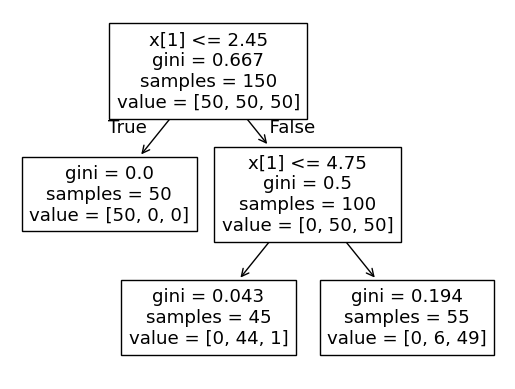

In [24]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [25]:
# python
def find_best_split(x, y):
    best_dim = -1
    best_value = None
    best_entropy = np.inf
    best_entropy_left, best_entropy_right = None, None

    for dim in range(x.shape[1]):
        sorted_index = np.argsort(x[:, dim])
        for i in range(x.shape[0] - 1):
            left_value = x[sorted_index[i], dim]
            right_value = x[sorted_index[i + 1], dim]
            if left_value != right_value:
                value = (left_value + right_value) / 2
                x_left, y_left, x_right, y_right = split_dataset(x, y, dim, value)

                # 跳过空划分
                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                # 这里必须用标签数组计算熵
                left_entropy, right_entropy = calc_gini(y_left), calc_gini(y_right)
                entropy = (len(y_left) * left_entropy + len(y_right) * right_entropy) / x.shape[0]

                if entropy < best_entropy:
                    best_entropy = entropy
                    best_entropy_left = left_entropy
                    best_entropy_right = right_entropy
                    best_dim = dim
                    best_value = value

    return best_dim, best_value, best_entropy, best_entropy_left, best_entropy_right


In [26]:
find_best_split(x, y)

(1, np.float64(2.45), 0.3333333333333333, 0.0, 0.5)